In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("17-04_to_02-05.csv")
df.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND)
0,22539926,225.0,45.0,3.0,5.0,Sổ hồng,10.839189,106.661079,850.0,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,Quận Gò Vấp,Phường 11,Thống Nhất,6.50
1,22524911,126.0,33.0,5.0,6.0,Sổ hồng,10.807009,106.691612,850.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,Quận Bình Thạnh,Phường 7,Lê Quang Định,5.10
2,22521691,109.0,63.0,4.0,4.0,Sổ hồng,10.812072,106.687519,850.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,Quận Bình Thạnh,Phường 5,Lê Quang Định,6.95
3,22538386,78.0,39.0,2.0,2.0,Sổ hồng,10.805522,106.705147,850.0,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,Quận Bình Thạnh,Phường 24,Bùi Đình Túy,4.78
4,22448804,300.0,60.0,3.0,4.0,Sổ hồng,10.845728,106.644039,850.0,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,Quận Gò Vấp,Phường 14,Đường 44,7.20


## Khám phá dữ liệu

In [3]:
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

In [4]:
df['price(billionVND)'].describe()

count    1.788200e+04
mean     2.710995e+01
std      1.295326e+02
min      1.150000e-07
25%      5.057500e+00
50%      8.690000e+00
75%      2.150000e+01
max      7.600000e+03
Name: price(billionVND), dtype: float64

Nhận thấy rằng giá trị max không hợp lý

In [5]:
df.columns

Index(['id', 'area_used', 'area', 'bedroom', 'wc', 'juridical', 'latitude',
       'longitude', 'seniority', 'witdh', 'length', 'no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km', 'address_district', 'address_ward',
       'address_street', 'price(billionVND)'],
      dtype='object')

Xử lý giá nhà
- Đối với những nhà > 1000 tỷ thì diện tích > 500m2

In [6]:
df[df['price(billionVND)'] > 1000]

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND)
19,22120776,7.0,7.0,1.0,1.0,Sổ hồng,10.791380,106.688983,2400.0,37.5,56.0,5.0,20.0,73.0,92.0,27.0,38.0,0.0,4.0,8.0,4.0,Quận 1,Phường Tân Định,Võ Thị Sáu,1350.0
625,22453191,4.0,4.0,15.0,15.0,Sổ hồng,10.787884,106.698403,2400.0,19.0,26.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,6.0,6.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu,1050.0
1615,22442886,3050.0,3050.0,3.0,3.0,Sổ hồng,10.780748,106.691662,2400.0,35.0,90.0,8.0,27.0,123.0,179.0,54.0,45.0,0.0,1.0,3.0,7.0,Quận 3,Phường 6 (Phường Võ Thị Sáu),Pasteur,2120.0
2238,22505118,72.0,72.0,3.0,2.0,Không xác định,10.847901,106.781555,116.0,4.0,16.0,3.0,10.0,3.0,7.0,8.0,8.0,0.0,1.0,2.0,4.0,Quận 9 (TP. Thủ Đức),Phường Hiệp Phú,Trương Văn Thành,4190.0
3923,22437840,32.0,32.0,5.0,5.0,Sổ hồng,10.781120,106.704693,330.0,33.0,39.0,2.0,9.0,163.0,217.0,38.0,44.0,0.0,1.0,4.0,4.0,Quận 1,Phường Bến Nghé,Mạc Đĩnh Chi,1200.0
5643,22480372,258.0,68.0,4.0,5.0,Sổ hồng,10.806956,106.605865,725.0,4.0,17.0,0.0,4.0,3.0,2.0,4.0,2.0,0.0,0.0,0.0,3.0,Quận Bình Tân,Phường Bình Hưng Hòa,Đường số 15,6290.0
6387,22537874,90.0,49.0,2.0,1.0,Sổ hồng,10.833191,106.712540,2310.0,4.0,10.0,0.0,3.0,15.0,2.0,1.0,2.0,0.0,1.0,6.0,7.0,Quận Thủ Đức (TP. Thủ Đức),Phường Hiệp Bình Chánh,Đường số 7,3650.0
6531,22304286,90.0,45.0,4.0,3.0,Sổ hồng,10.773942,106.682941,515.0,5.0,13.0,8.0,18.0,73.0,111.0,24.0,33.0,0.0,5.0,4.0,7.0,Quận 3,Phường 4,Nguyễn Đình Chiểu,6500.0
6702,22340776,120.0,40.0,3.0,3.0,Sổ hồng,10.793183,106.674568,515.0,4.0,10.0,5.0,26.0,61.0,42.0,18.0,37.0,0.0,3.0,10.0,6.0,Quận Phú Nhuận,Phường 11,Nguyễn Đình Chính,7600.0
10891,22538180,508.0,508.0,15.0,15.0,Sổ đỏ,10.787884,106.698403,16.0,19.0,27.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,0.0,6.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu,1100.0


In [7]:
index_outlier = df[(df['price(billionVND)'] > 1000) & ((df['area'] < 400) | (df['area_used'] < 400))].index
index_outlier

Index([19, 625, 2238, 3923, 5643, 6387, 6531, 6702, 11327, 13097, 13142,
       17701],
      dtype='int64')

In [8]:
df.drop(index_outlier, inplace=True)

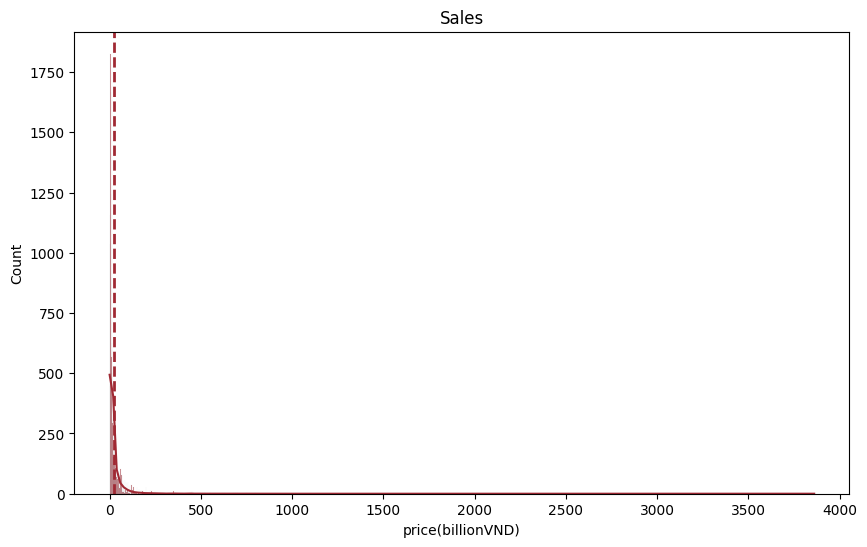

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price(billionVND)'], color=colors[7], kde=True)
plt.axvline(x=df['price(billionVND)'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Sales');

### Câu hỏi

Có thể chia ra 4 nhóm:
- Nhóm 1: > 300tr
- Nhóm 2: > 200tr
- Nhóm 3: > 100tr
- Nhóm 4: < 100tr

### Câu hỏi

#### Mối quan hệ tương quan giữa giá nhà với ‘area’, ‘bedroom’, ‘wc’, ‘juridical’, ‘seniority’, ‘no_hospital_1km’, ‘no_school_1km’, ‘no_cafe_1km’, ‘no_restaurant_1km’, ‘no_atm_1km’, ‘no_bank_1km’, ‘no_supermarket_1km’, ‘no_marketplace_1km’, ‘no_pharmacy_1km’, ‘no_fuel_1km

In [20]:
df.columns

Index(['id', 'area_used', 'area', 'bedroom', 'wc', 'juridical', 'latitude',
       'longitude', 'seniority', 'witdh', 'length', 'no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km', 'address_district', 'address_ward',
       'address_street', 'price(billionVND)',
       'price_per_square_meters(mil/m2)'],
      dtype='object')

##### Mối quan hệ tương quan giữa giá nhà và các thông số của ngôi nhà

Xử lý `juridical`

In [21]:
df['juridical'].unique()

array(['Sổ hồng', 'Sổ đỏ', 'Hợp đồng mua bán', 'Không xác định',
       'Giấy tờ hợp lệ', 'Giấy tờ viết tay'], dtype=object)

Pháp lý `Không xác định` -> 0, còn lại sẽ trả về 1

In [22]:
df.loc[df['juridical'] != 'Không xác định', 'juridical'] = 1
df.loc[df['juridical'] == 'Không xác định', 'juridical'] = 0

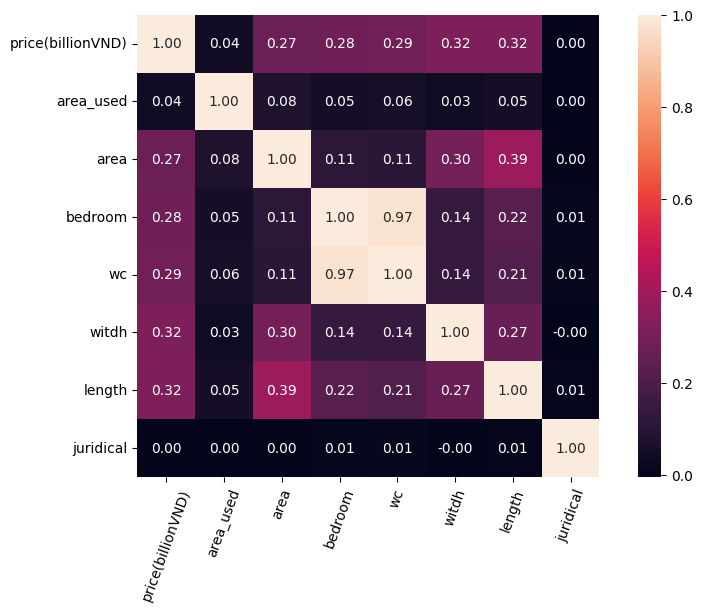

In [46]:
df_params = df[['price(billionVND)','area_used', 'area', 'bedroom', 'wc', 'witdh','length','juridical']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_params.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- `bedroom` và `wc` có mối tương quan rất mạnh (0.97) -> số lượng phòng ngủ và wc thường đi đôi với nhau trong 1 ngôi nhà
- `price(billionVND)` và các biến khác: Giá nhà `price(billionVND)` có mối tương quan tương đối thấp với `area_used` (0.022288) và `area` (0.139898), nhưng lại có mối tương quan cao hơn với `bedroom` (0.149336), `wc` (0.151473), `witdh` (0.175589) và `length` (0.171985). Điều này có thể cho thấy kích thước và số lượng phòng trong ngôi nhà có ảnh hưởng đến giá nhà nhiều hơn diện tích sử dụng và diện tích tổng thể.
- `juridical` và các biến khác: `juridical` có mối tương quan rất thấp với tất cả các biến khác, cho thấy tình hình pháp lý có thể không ảnh hưởng nhiều đến giá nhà hoặc các thông số khác của ngôi nhà.

##### Mối quan hệ tương quan giữa giá nhà và các tiện ích xung quanh

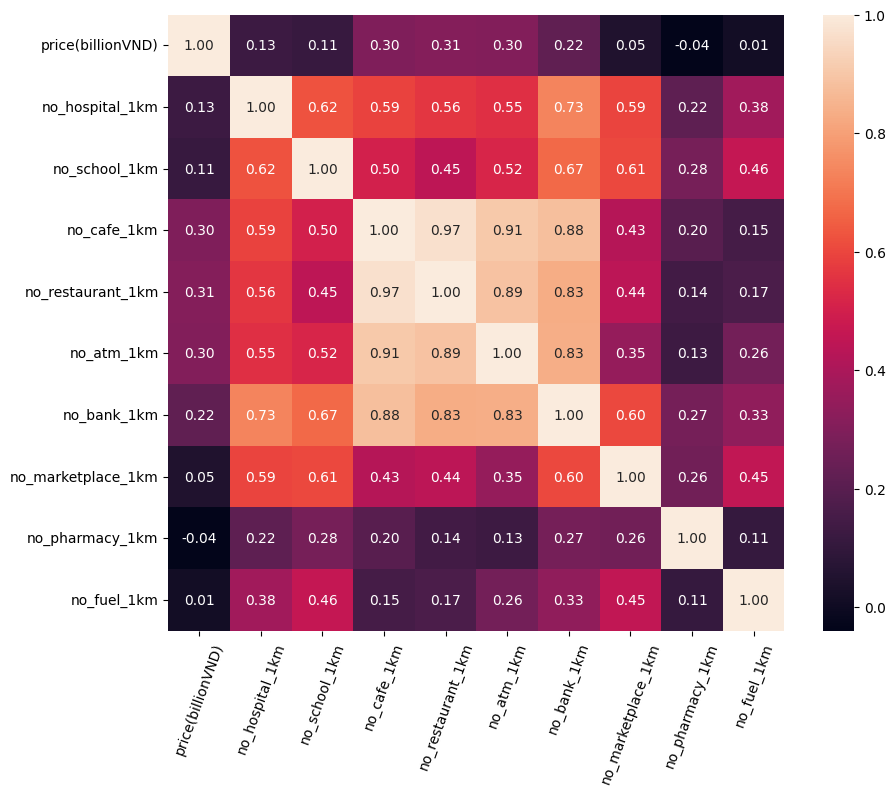

In [45]:
df_around = df[['price(billionVND)','no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km']]

plt.figure(figsize=(10, 8))
sns.heatmap(df_around.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- Có một mối tương quan tích cực giữa giá nhà và số lượng các tiện ích: cà phê (0.3), nhà hàng (0.31), atm(0.3), ngân hàng (0.22). Điều này cho thấy giá nhà gần các tiện ích này thường có giá cao hơn nhà gần các tiện ích khác
- Bệnh viện, trường học và giá nhà: Mối tương quan giữa giá nhà và số lượng bệnh viện (‘no_hospital_1km’: 0.126) hoặc trường học (‘no_school_1km’: 0.114) trong bán kính 1km là tương đối thấp. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng nhiều đến giá nhà như các tiện ích khác
- Chợ, hiệu thuốc, trạm xăng và giá nhà: Mối tương quan giữa giá nhà và số lượng chợ (‘no_marketplace_1km’: 0.048), hiệu thuốc (‘no_pharmacy_1km’: -0.040), hoặc trạm xăng (‘no_fuel_1km’: 0.012) trong bán kính 1km rất thấp hoặc gần như không có. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng đến giá nhà.
- Giữa các tiện ích với nhau:
    - Có một số mối tương quan mạnh giữa các tiện ích xung quanh, chẳng hạn như ‘no_cafe_1km’ và ‘no_restaurant_1km’ (0.970), ‘no_cafe_1km’ và ‘no_atm_1km’ (0.905), ‘no_restaurant_1km’ và ‘no_atm_1km’ (0.890). Điều này có thể cho thấy rằng các tiện ích thường được đặt gần nhau.

Kết luận: **Vì hệ số tương quan giữa giá nhà và các tiện ích rất thấp (cao nhất là 0.31) nên ngoài số lượng tiện ích còn có những yếu tố khác nữa đang ảnh hưởng đến giá nhà**

In [26]:
df_around.columns[1:]

Index(['no_hospital_1km', 'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km',
       'no_atm_1km', 'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km'],
      dtype='object')

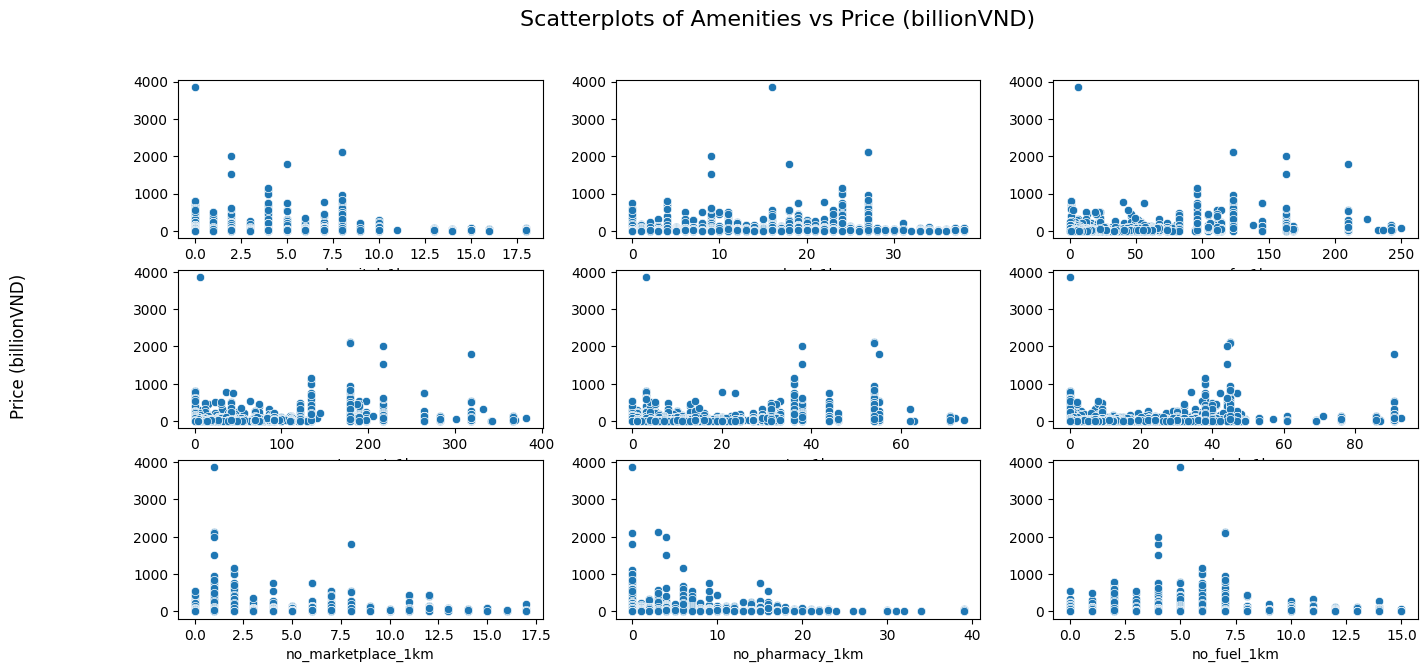

In [50]:
f, ax = plt.subplots(3,3,figsize =(16, 7))
index = 0
for row in range(3):
    for col in range(3):
        sns.scatterplot(x=df_around.columns[1:][index], y='price(billionVND)', data=df, ax=ax[row][col])
        ax[row][col].set_ylabel('')
        index += 1
f.suptitle('Scatterplots of Amenities vs Price (billionVND)', fontsize=16)
f.supylabel('Price (billionVND)')
plt.show()

Nhận xét:
- Tiện ích và giá nhà: Dựa trên biểu đồ, không có mối tương quan mạnh mẽ rõ ràng giữa giá nhà và số lượng các tiện ích như bệnh viện, trường học, cà phê, nhà hàng, ATM, ngân hàng, siêu thị, chợ, hiệu thuốc, và trạm xăng trong bán kính 1km. Điều này có thể cho thấy rằng mặc dù các tiện ích này quan trọng, nhưng chúng có thể không phải là yếu tố duy nhất ảnh hưởng đến giá nhà.
- Phân tán dữ liệu: Dữ liệu trong biểu đồ phân tán rất rộng, cho thấy có sự biến động lớn trong giá nhà cũng như số lượng các tiện ích xung quanh. Điều này có thể phản ánh sự đa dạng của các ngôi nhà và khu vực xung quanh chúng.
- Không có xu hướng rõ ràng: Không có xu hướng tăng hoặc giảm rõ ràng giữa giá nhà và số lượng các tiện ích, cho thấy có thể có các yếu tố khác ngoài số lượng tiện ích ảnh hưởng đến giá nhà.

#### Giá nhà giữa các khu vực

##### Giá nhà trên mét vuông = giá tiền / diện tích sử dụng

In [10]:
df['area'].describe()

count    17870.000000
mean       120.034079
std        362.287836
min          1.000000
25%         52.000000
50%         74.000000
75%        120.000000
max      34444.000000
Name: area, dtype: float64

In [11]:
df.drop(df[df['area'] < 10].index, inplace=True)

In [12]:
df['price(billionVND)'].describe()

count    16681.000000
mean        25.248582
std         70.612239
min          0.003500
25%          5.468000
50%          8.990000
75%         22.000000
max       3860.000000
Name: price(billionVND), dtype: float64

In [13]:
df['price_per_square_meters(mil/m2)'] = df['price(billionVND)']/df['area']*1000

In [14]:
mean_district_prices = df.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values(ascending=True)
mean_district_prices

address_district
Huyện Củ Chi                   12.461423
Huyện Cần Giờ                  33.962264
Huyện Bình Chánh               40.070465
Huyện Hóc Môn                  48.402180
Quận 12                        66.520262
Quận Thủ Đức (TP. Thủ Đức)     72.847471
Quận 9 (TP. Thủ Đức)           82.583986
Quận 8                         91.322522
Huyện Nhà Bè                   96.350917
Quận Bình Tân                 104.757408
Quận Gò Vấp                   107.378628
Quận Tân Phú                  127.168720
Quận 6                        143.150129
Quận Bình Thạnh               144.602729
Quận 7                        145.543302
Quận Tân Bình                 156.957862
Quận 4                        172.034626
Quận 11                       173.655711
Quận Phú Nhuận                180.730078
Quận 2 (TP. Thủ Đức)          224.775433
Quận 10                       231.796495
Quận 5                        263.229265
Quận 3                        336.380017
Quận 1                        493.117048

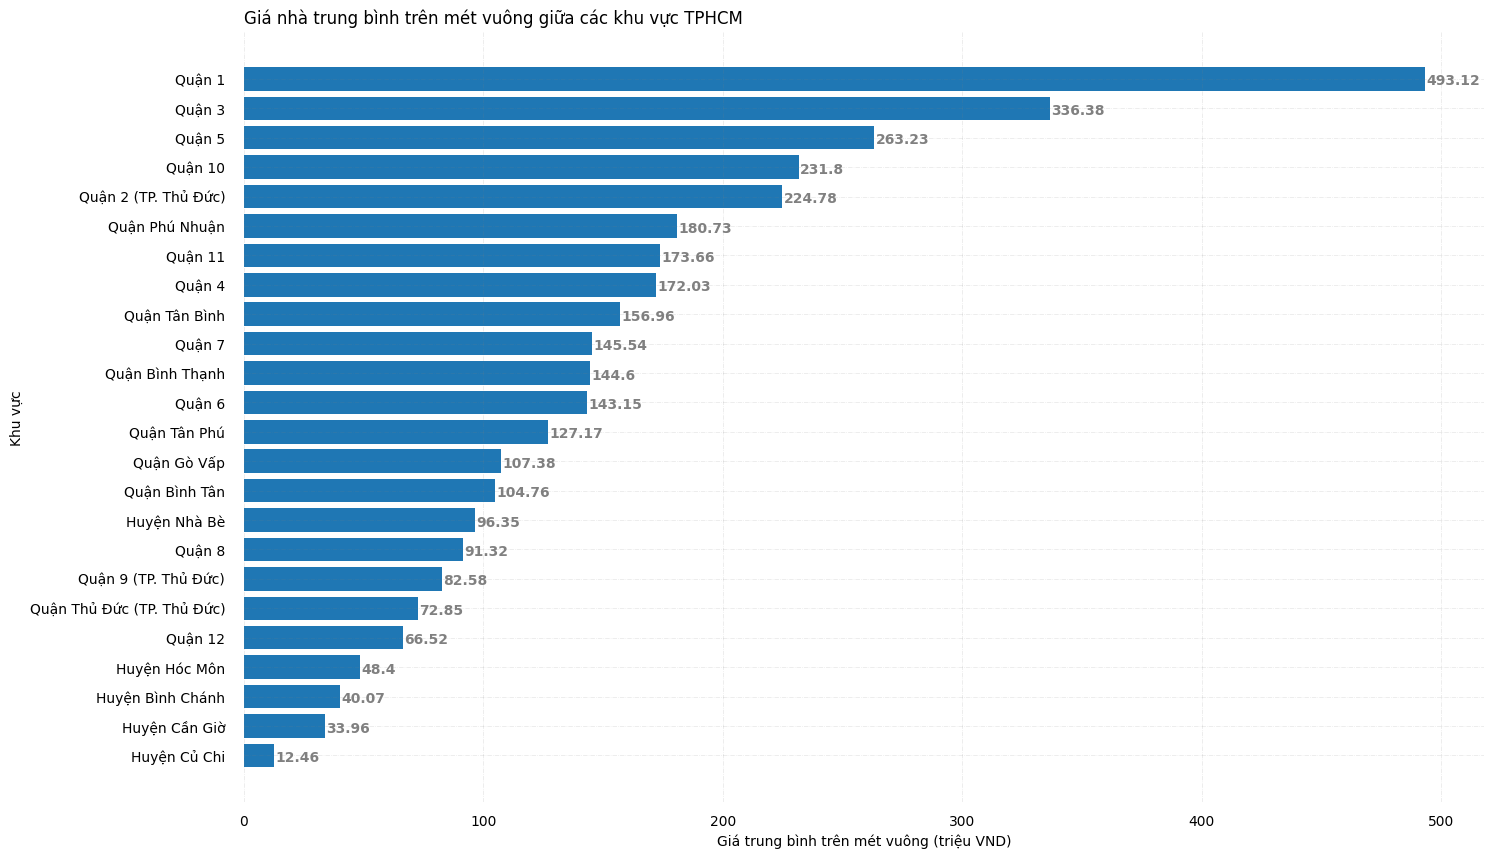

In [15]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(mean_district_prices.index, mean_district_prices)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
# ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Giá nhà trung bình trên mét vuông giữa các khu vực TPHCM', loc ='left')
ax.set_xlabel('Giá trung bình trên mét vuông (triệu VND)')
ax.set_ylabel('Khu vực')
# Show Plot
plt.show()

Nhận xét:
- Quận 1 có mức giá đất cao nhất thành phố, đạt 528,6 triệu đồng/m2, gấp 42 lần so với quận có mức giá thấp nhất là Huyện Củ Chi (chỉ 12,46 triệu đồng/m2).
- Quận 3 cũng nằm trong nhóm có giá đất cao nhất TP.HCM với 476,84 triệu đồng/m2. Quận Phú Nhuận đứng thứ 3 với 390,94 triệu đồng/m2.
- Sự chênh lệch giá đất giữa các khu vực trung tâm và ngoại thành là rất lớn. Trong khi các quận 1, 3, Phú Nhuận có giá trên 300 triệu đồng/m2 thì các huyện Hóc Môn, Bình Chánh, Cần Giờ, Củ Chi chỉ dưới 50 triệu đồng/m2.
- TP.Thủ Đức và các quận thuộc TP.Thủ Đức như quận 2, 9 cũng có mức giá khá cao, trên 200 triệu đồng/m2, phản ánh sự phát triển của khu vực này.
- Các quận trung tâm khác như quận 5, 10, Bình Tân, Tân Bình vẫn đạt mức giá cao từ 150-300 triệu đồng/m2.
- Trong số các quận ngoại thành, quận Gò Vấp và Nhà Bè có mức giá khá cao so với các huyện khác, lần lượt đạt 107,38 và 96,35 triệu đồng/m2.

Nhìn chung, biểu đồ phản ánh rõ nét sự phân hóa giá nhà đất theo vùng địa lý tại TP.HCM, với sự chênh lệch rất lớn giữa trung tâm và ngoại thành, phù hợp với mô hình phát triển kinh tế - xã hội không cân đối giữa các khu vực của thành phố.

##### Tại sao lại có sự chênh lệch giá nhà giữa các quận
- Vị trí địa lý: Các quận trung tâm như Quận 1, Quận 3 thường có giá nhà cao hơn do vị trí thuận lợi, gần các khu vực kinh doanh, thương mại và dịch vụ hấp dẫn.
- Hạ tầng và tiện ích: Các quận phát triển hơn với hệ thống giao thông, hạ tầng xã hội tốt hơn sẽ có giá nhà cao hơn các quận vùng ven.
- Cung cầu nhà đất: Tại các quận trung tâm, nguồn cung nhà đất hạn chế trong khi nhu cầu cao sẽ đẩy giá nhà lên cao.
- Môi trường sống: Các quận có môi trường sống đô thị, an ninh tốt hơn thường được ưa chuộng hơn, từ đó làm tăng giá nhà.

In [16]:
df.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND),price_per_square_meters(mil/m2)
0,22539926,225.0,45.0,3.0,5.0,Sổ hồng,10.839189,106.661079,850.0,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,Quận Gò Vấp,Phường 11,Thống Nhất,6.50,144.444444
1,22524911,126.0,33.0,5.0,6.0,Sổ hồng,10.807009,106.691612,850.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,Quận Bình Thạnh,Phường 7,Lê Quang Định,5.10,154.545455
2,22521691,109.0,63.0,4.0,4.0,Sổ hồng,10.812072,106.687519,850.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,Quận Bình Thạnh,Phường 5,Lê Quang Định,6.95,110.317460
3,22538386,78.0,39.0,2.0,2.0,Sổ hồng,10.805522,106.705147,850.0,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,Quận Bình Thạnh,Phường 24,Bùi Đình Túy,4.78,122.564103
4,22448804,300.0,60.0,3.0,4.0,Sổ hồng,10.845728,106.644039,850.0,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,Quận Gò Vấp,Phường 14,Đường 44,7.20,120.000000


In [17]:
# Thống kê số lượng tiện ích xung quanh giữa các quận
df_sum_around = df.groupby('address_district', as_index=False)[['no_hospital_1km', 'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km',
                                                                'no_atm_1km', 'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km', 'no_pharmacy_1km', 'no_fuel_1km']].count()
df_sum_around

,address_district,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km
0,Huyện Bình Chánh,54,54,54,54,54,54,54,54,54,54
1,Huyện Cần Giờ,1,1,1,1,1,1,1,1,1,1
2,Huyện Củ Chi,14,14,14,14,14,14,14,14,14,14
3,Huyện Hóc Môn,285,285,285,285,285,285,285,285,285,285
4,Huyện Nhà Bè,135,135,135,135,135,135,135,135,135,135
5,Quận 1,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042
6,Quận 10,832,832,832,832,832,832,832,832,832,832
7,Quận 11,231,231,231,231,231,231,231,231,231,231
8,Quận 12,1099,1099,1099,1099,1099,1099,1099,1099,1099,1099
9,Quận 2 (TP. Thủ Đức),831,831,831,831,831,831,831,831,831,831


Mật độ các tiện ích trên diện tích khu vực

In [34]:
# import diện tích khu vực
df_acreage = pd.read_excel("./acreage_district2023.xlsx")

In [19]:
df_sum_around = df_sum_around.merge(df_acreage, left_on='address_district', right_on='Quận')
df_sum_around.drop(columns=['Quận'], inplace=True)
df_sum_around

,address_district,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,Dân số (người),Diện tích (km²),Mật độ dân số (người/km²),Số Phường/Xã
0,Huyện Bình Chánh,54,54,54,54,54,54,54,54,54,54,680000,253,2688,16
1,Huyện Cần Giờ,1,1,1,1,1,1,1,1,1,1,74960,704,106,7
2,Huyện Củ Chi,14,14,14,14,14,14,14,14,14,14,403038,435,926,21
3,Huyện Hóc Môn,285,285,285,285,285,285,285,285,285,285,422471,109,3875,12
4,Huyện Nhà Bè,135,135,135,135,135,135,135,135,135,135,175360,100,1753,7
5,Quận 1,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042,205180,7.73,26543,10
6,Quận 10,832,832,832,832,832,832,832,832,832,832,372450,5.72,65113,15
7,Quận 11,231,231,231,231,231,231,231,231,231,231,332536,5.14,64695,16
8,Quận 12,1099,1099,1099,1099,1099,1099,1099,1099,1099,1099,520175,52.78,9855,11
9,Quận 2 (TP. Thủ Đức),831,831,831,831,831,831,831,831,831,831,168680,49.74,3391,11
